In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys 
sys.path.insert(0, '../src/')

from astropy.table import Table
import galhalo
import os
import warnings; warnings.simplefilter('ignore')


>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


$\log_{10} (M_{*}) = \log_{10} (\epsilon M_{1})+ \alpha \log_{10} (M_{peak}) - \alpha \log_{10}(M_1)$

$\sigma(M_{peak}) = \sigma_0 + \gamma \left( \log_{10} (M_{peak}) − \log_{10}( M_1 ) \right)$

In [2]:
def dex(value):
    
    #10^(0.1) = 0.1 dex
    
    return 10**(value)

In [3]:
halo_masses = np.logspace(8, 12, 100) # just for the model

stellar_masses = galhalo.lgMs_D22_det(halo_masses) 

stellar_masses_15 = galhalo.lgMs_D22_dex(halo_masses, 0.15) 

stellar_masses_5 = galhalo.lgMs_D22_dex(halo_masses, 0.5) 

stellar_masses_2 = galhalo.lgMs_D22_dex(halo_masses, 2) 

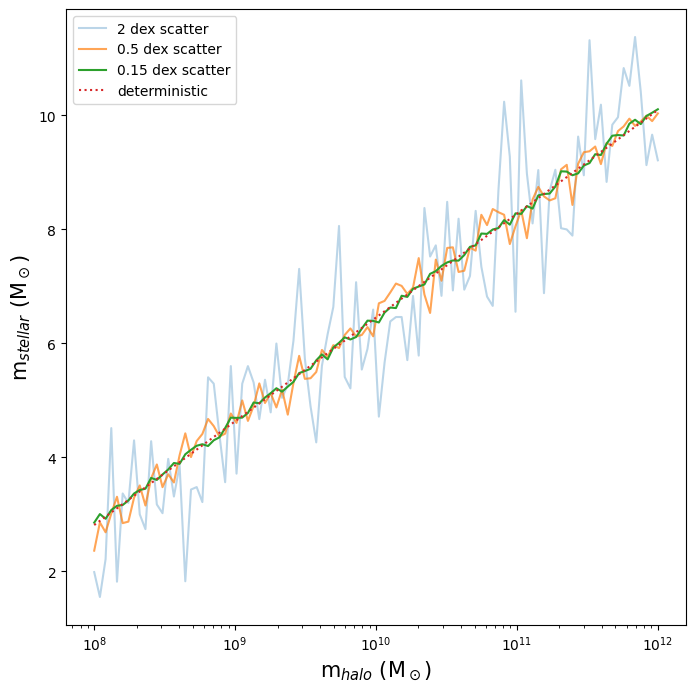

In [7]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_2, label="2 dex scatter", alpha=0.3)
plt.plot(halo_masses, stellar_masses_5, label="0.5 dex scatter", alpha=0.7)
plt.plot(halo_masses, stellar_masses_15, label="0.15 dex scatter")

plt.plot(halo_masses, stellar_masses, ls=":", label="deterministic")

plt.xscale("log")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
plt.savefig("../figures/SHMR_scatter.png")
plt.show()